In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import aplpy
from astropy.io import fits
from reproject import reproject_interp
from astropy.constants import c, k_B, h

import molecular_columns as mol_col

from scipy import stats
from config import file_oNH2D_Tex, file_oNH2D_eTex, file_oNH2D_tau, file_oNH2D_etau, \
    file_oNH2D_Vlsr, file_oNH2D_eVlsr, file_oNH2D_dv, file_oNH2D_edv, \
    file_pNH2D_Tex, file_pNH2D_eTex, file_pNH2D_tau, file_pNH2D_etau, \
    file_pNH2D_Vlsr, file_pNH2D_eVlsr, file_pNH2D_dv, file_pNH2D_edv, \
    file_NH3_Tex, file_NH3_eTex, file_NH3_Tkin, file_NH3_eTkin, \
    file_NH3_Ncol, file_NH3_eNcol, file_NH3_Vlsr, file_NH3_eVlsr, \
    file_NH3_dv,  file_NH3_edv

plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     'xtick.direction': 'in',
                     'ytick.direction': 'in'})

In [70]:
file_NH3_TdV = 'data/H-MM1_NH3_11_TdV.fits'
file_oNH2D_TdV = 'data/H-MM1_oNH2D_TdV.fits'
file_pNH2D_TdV = 'data/H-MM1_pNH2D_TdV.fits'
file_H2 = 'data/H-MM1_NH2_6arcsec_aligned.fits'

xpos_lab1, ypos_lab1 = (0.65, 0.915)
xpos_lab2, ypos_lab2 = (0.65, 0.83)
xpos_lab3, ypos_lab3 = (0.075, 0.875)

col_pos = [0.675, 0.7, 0.185, 0.025]

cont_NH3 = np.arange(1.5, 5.1, 0.75)
cont_oNH2D = np.arange(0.08, 0.9, 0.08)
cont_pNH2D = np.arange(0.05, 0.6, 0.05)

color_kde = ['#e41a1c', 'blue']

In [3]:
distance = 145. # pc

def plot_setup_vla(fig_i, label_col='black', do_zoom=True):
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.set_nan_color('0.85')
    if do_zoom:
        fig_i.recenter(246.9954991667, -24.5577775, radius=80*(u.arcsec).to(u.deg))
    fig_i.add_beam(color=label_col)
    ang_size = (3e3 / distance)*u.arcsec
    fig_i.add_scalebar(ang_size, label='3,000 au', color=label_col)
    #
    fig_i.tick_labels.set_xformat('hh:mm:ss')
    fig_i.tick_labels.set_yformat('dd:mm')
    fig_i.ticks.set_length(6)
    fig_i.ax.tick_params(which='minor', length=3)
    fig_i.ticks.set_xspacing(4*15./3600.)
    fig_i.ticks.set_minor_frequency(4)
    #
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    fig_i.show_contour(file_NH3_TdV, levels=cont_NH3, colors='white', linewidths=1.5)
    fig_i.show_contour(file_NH3_TdV, levels=cont_NH3, colors='black', linewidths=1)
    return fig_i


def plot_setup_alma(fig_i, label_col='black', do_zoom=True, do_para=False):
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.set_nan_color('0.85')
    if do_zoom:
        fig_i.recenter(246.9954991667, -24.5577775, radius=63*(u.arcsec).to(u.deg))
    fig_i.add_beam(color=label_col)
    ang_size = (1.5e3 / distance)*u.arcsec
    fig_i.add_scalebar(ang_size, label='1,500 au', color=label_col)
    #
    fig_i.tick_labels.set_xformat('hh:mm:ss')
    fig_i.tick_labels.set_yformat('dd:mm')
    fig_i.ticks.set_length(6)
    fig_i.ax.tick_params(which='minor', length=3)
    fig_i.ticks.set_xspacing(4*15./3600.)
    fig_i.ticks.set_minor_frequency(4)
    #
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    if do_para:
        fig_i.show_contour(file_pNH2D_TdV, levels=cont_pNH2D, colors='white', linewidths=1.5)
        fig_i.show_contour(file_pNH2D_TdV, levels=cont_pNH2D, colors='black', linewidths=1)
    else:
        fig_i.show_contour(file_oNH2D_TdV, levels=cont_oNH2D, colors='white', linewidths=1.5)
        fig_i.show_contour(file_oNH2D_TdV, levels=cont_oNH2D, colors='black', linewidths=1)
    return fig_i

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


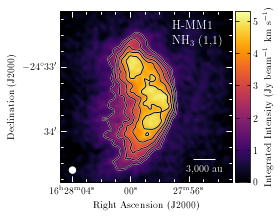

In [4]:
text_color = 'white'
fig = aplpy.FITSFigure(file_NH3_TdV, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=5.3, cmap='inferno', interpolation='None')
plot_setup_vla(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
# fig_i.colorbar.set_ticks([0,40,80,120,160])
fig.colorbar.set_axis_label_text('Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_TdV.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


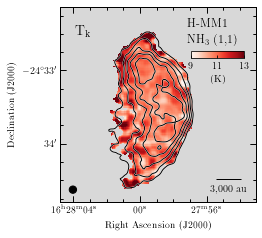

In [5]:
text_color = 'black'

fig = aplpy.FITSFigure(file_NH3_Tkin, figsize=(4, 4))
fig.show_colorscale(vmin=9., vmax=13., cmap='Reds', interpolation='None')
plot_setup_vla(fig, label_col=text_color, do_zoom=True)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'T$_{\rm k}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([9, 11, 13])
fig.colorbar.set_axis_label_text(r'(K)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_Tkin.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


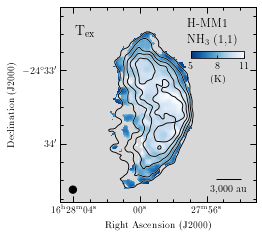

In [6]:
text_color = 'black'

fig = aplpy.FITSFigure(file_NH3_Tex, figsize=(4, 4))
fig.show_colorscale(vmin=5., vmax=11., cmap='Blues_r', interpolation='None')
plot_setup_vla(fig, label_col=text_color, do_zoom=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'T$_{\rm ex}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([5, 8, 11])
fig.colorbar.set_axis_label_text(r'(K)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_Tex.pdf', dpi=100)

In [7]:
NH3_Ncol, hd = fits.getdata(file_NH3_Ncol, header=True)
NH3_Ncol_lin = 10**(NH3_Ncol - 14.)
hdu_NH3_Ncol_lin = fits.PrimaryHDU(NH3_Ncol_lin, hd)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


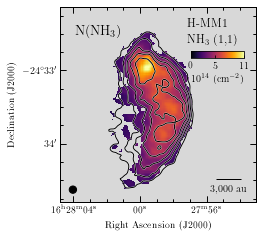

In [8]:
text_color = 'black'

fig = aplpy.FITSFigure(hdu_NH3_Ncol_lin, figsize=(4, 4))
fig.show_colorscale(vmin=0., vmax=11., cmap='inferno', interpolation='None')
plot_setup_vla(fig, label_col=text_color, do_zoom=True)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'N(NH$_{3}$)', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0, 5, 11])
fig.colorbar.set_axis_label_text(r'$10^{14}$ (cm$^{-2}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_Ncol.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


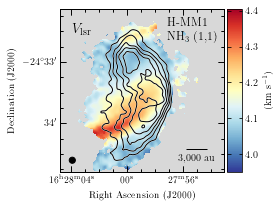

In [9]:
text_color = 'black'

fig = aplpy.FITSFigure(file_NH3_Vlsr, figsize=(4, 4))
fig.show_colorscale(vmin=3.95, vmax=4.405, cmap='RdYlBu_r', interpolation='None')
plot_setup_vla(fig, label_col=text_color, do_zoom=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$V_{\rm lsr}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([4.0, 4.1, 4.2, 4.3, 4.4])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_Vlsr.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  cm.set_bad(color)
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


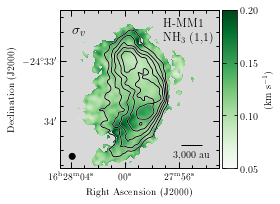

In [10]:
text_color = 'black'

fig = aplpy.FITSFigure(file_NH3_dv, figsize=(4, 4))
fig.show_colorscale(vmin=0.05, vmax=0.2, cmap='Greens', interpolation='None')
plot_setup_vla(fig, label_col=text_color, do_zoom=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$ (1,1)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\sigma_{v}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([0.05, 0.1, 0.15, 0.2])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_dv.pdf', dpi=100)

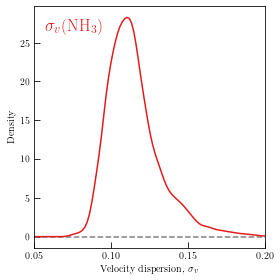

In [11]:
xrange = np.array([0.05, 0.2])
NH3_dv = fits.getdata(file_NH3_dv)
NH3_edv = fits.getdata(file_NH3_edv)
gd = np.isfinite(NH3_dv)
wt = 1 / NH3_dv[gd]**2
#
kde_dv = stats.gaussian_kde(NH3_dv[gd], weights=wt)
x_sample = np.linspace(xrange[0], xrange[1], num=100)
dv_sample = np.reshape(kde_dv(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, dv_sample, color=color_kde[0], label=r'$\sigma_v$')
#
ax.text(0.05, 0.9,  r'$\sigma_v$(NH$_3$)', color=color_kde[0],
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity dispersion, $\sigma_{v}$")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)

ax.set_xticks([0.05, 0.1, 0.15, 0.2])
# ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)
plt.tight_layout()                                                      
fig.savefig('figs/H-MM1_NH3_dv_KDE.pdf', dpi=100)

In [12]:
range_N11 = [1.2, 11.5]
tk = fits.getdata(file_NH3_Tkin)

In [13]:
import scipy
gd_spec = np.isfinite(NH3_Ncol_lin * tk)
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(
    NH3_Ncol_lin[gd_spec], tk[gd_spec], 
    statistic='mean', bins=15, range=range_N11)

bin_ctr = 0.5 * (bin_edges[1:] + bin_edges[:-1])

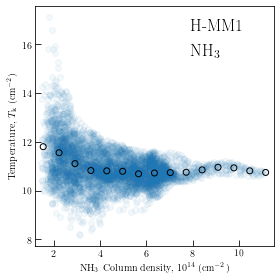

In [14]:
range_N11 = [1.2, 11.5]

tk = fits.getdata(file_NH3_Tkin)
# N11 = fits.getdata(file_NH3_Ncol)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(NH3_Ncol_lin, tk, alpha=0.05)#, facecolors='blue', edgecolors='gray')
ax.scatter(bin_ctr, bin_means, edgecolor='black', facecolors='None')
ax.set_xlim(range_N11)

ax.set_xlabel(r"NH$_3$ Column density, $10^{14}$ (cm$^{-2}$)")
ax.set_ylabel(r"Temperature, $T_{\rm k}$ (cm$^{-2}$)")
#
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

ax.text(0.65, 0.9,  r'H-MM1', color='black', 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.65, 0.8,  r'NH$_3$', color='black', 
        transform=ax.transAxes, size=17, weight=60)
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_Tk_Ncol.pdf', dpi=100)

## Maps of NH$_2$D
Ingegfrated intensity

In [15]:
plt.rcParams['font.weight']

'normal'

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


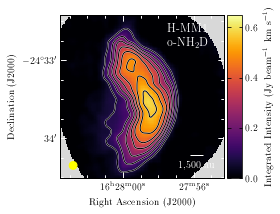

In [16]:
text_color = 'white'
fig = aplpy.FITSFigure(file_oNH2D_TdV, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=0.65, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
fig.beam.set_edgecolor('black')
fig.beam.set_color('yellow')
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
fig.colorbar.set_ticks([0, 0.2, 0.4, 0.6])
fig.colorbar.set_axis_label_text('Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_TdV.pdf', dpi=150)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


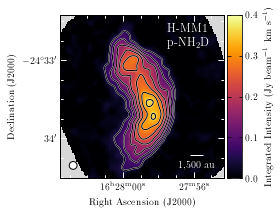

In [17]:
text_color = 'white'
fig = aplpy.FITSFigure(file_pNH2D_TdV, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=0.4, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_para=True)
fig.beam.set_edgecolor('black')
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
fig.colorbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4])
fig.colorbar.set_axis_label_text('Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_TdV.pdf', dpi=150)

### Tau
First pair of plots are the value and uncertainty of Tau.

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


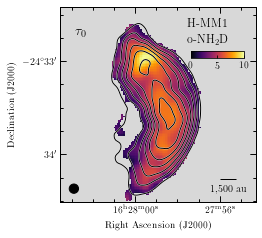

In [18]:
text_color = 'black'
fig = aplpy.FITSFigure(file_oNH2D_tau, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=10, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\tau_0$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0, 5, 10])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_tau.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


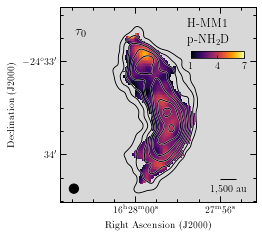

In [19]:
text_color = 'black'
fig = aplpy.FITSFigure(file_pNH2D_tau, figsize=(4, 4))
fig.show_colorscale(vmin=1, vmax=7, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_para=True)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\tau_0$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([1, 4, 7])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_tau.pdf', dpi=100)

### Tex

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


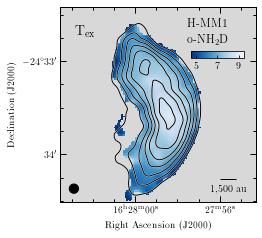

In [20]:
text_color = 'black'
fig = aplpy.FITSFigure(file_oNH2D_Tex, figsize=(4, 4))
fig.show_colorscale(vmin=4.5, vmax=9.5, cmap='Blues_r', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'T$_{\rm ex}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([5, 7, 9])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_Tex.pdf', dpi=120)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


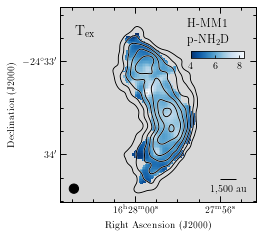

In [21]:
text_color = 'black'
fig = aplpy.FITSFigure(file_pNH2D_Tex, figsize=(4, 4))
fig.show_colorscale(vmin=4, vmax=8.4, cmap='Blues_r', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_para=True)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'T$_{\rm ex}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([4, 6, 8])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_Tex.pdf', dpi=120)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


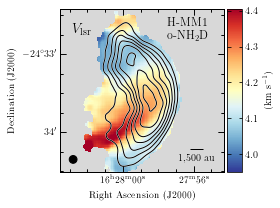

In [22]:
text_color = 'black'

fig = aplpy.FITSFigure(file_oNH2D_Vlsr, figsize=(4, 4))
fig.show_colorscale(vmin=3.95, vmax=4.405, cmap='RdYlBu_r', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_zoom=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$V_{\rm lsr}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([4.0, 4.1, 4.2, 4.3, 4.4])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_Vlsr.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


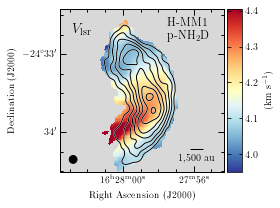

In [23]:
text_color = 'black'

fig = aplpy.FITSFigure(file_pNH2D_Vlsr, figsize=(4, 4))
fig.show_colorscale(vmin=3.95, vmax=4.405, cmap='RdYlBu_r', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_zoom=True, do_para=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$V_{\rm lsr}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([4.0, 4.1, 4.2, 4.3, 4.4])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_Vlsr.pdf', dpi=100)

In [24]:
vlsr_o, hd = fits.getdata(file_oNH2D_Vlsr, header=True)
vlsr_p = fits.getdata(file_pNH2D_Vlsr)
evlsr_o = fits.getdata(file_oNH2D_eVlsr)
evlsr_p = fits.getdata(file_pNH2D_eVlsr)
v_diff = vlsr_o - vlsr_p
ev_diff = np.hypot(evlsr_o, evlsr_p)

hdu_v_diff = fits.PrimaryHDU(v_diff*1e3, hd)
gd_velo = np.isfinite(vlsr_o * vlsr_p)
print(np.mean(v_diff[gd_velo]))

0.0036751367627999407


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdYlBu_r").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


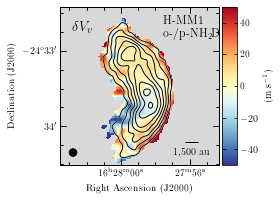

In [25]:
text_color = 'black'

fig = aplpy.FITSFigure(hdu_v_diff, figsize=(4, 4))
fig.show_colorscale(vmin=-50, vmax=50, cmap='RdYlBu_r', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_zoom=True, do_para=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-/p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\delta V_{v}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
# fig.colorbar.set_ticks([0.03, 0.06, 0.09])
fig.colorbar.set_axis_label_text(r'(m s$^{-1}$)')
plt.tight_layout()                                                      
# 
fig.savefig('figs/H-MM1_opNH2D_diff_Vlsr.pdf', dpi=100)

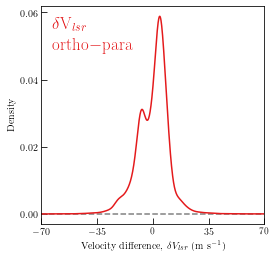

In [26]:

xrange = np.array([-0.07, 0.07])*1e3
wt = 1 / ev_diff[gd_velo]**2
#
kde_vdiff = stats.gaussian_kde(v_diff[gd_velo]*1e3, weights=wt)
x_sample = np.linspace(xrange[0], xrange[1], num=1000)
vdiff_sample = np.reshape(kde_vdiff(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, vdiff_sample, color=color_kde[0], 
        label=r'$\delta$ V$_{lsr}$')
#
ax.text(0.05, 0.9,  r'$\delta$V$_{lsr}$', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.05, 0.8,  r'ortho$-$para', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity difference, $\delta V_{lsr}$ (m s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)

ax.set_xticks([-70, -35, 0, 35, 70])
ax.set_yticks([0, 0.02, 0.04, 0.06])
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


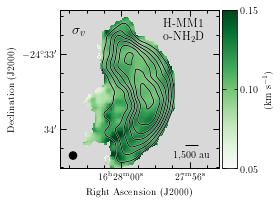

In [27]:
text_color = 'black'

fig = aplpy.FITSFigure(file_oNH2D_dv, figsize=(4, 4))
fig.show_colorscale(vmin=0.05, vmax=0.15, cmap='Greens', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_zoom=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'o-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\sigma_{v}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([0.05, 0.1, 0.15])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_dv.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


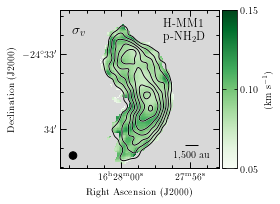

In [28]:
text_color = 'black'

fig = aplpy.FITSFigure(file_pNH2D_dv, figsize=(4, 4))
fig.show_colorscale(vmin=0.05, vmax=0.15, cmap='Greens', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_zoom=True, do_para=True)
#
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'p-NH$_2$D', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab3, ypos_lab3, r'$\sigma_{v}$', relative=True, 
                horizontalalignment='left', color=text_color, size=14)
#
fig.add_colorbar()
fig.colorbar.set_ticks([0.05, 0.1, 0.15])
fig.colorbar.set_axis_label_text(r'(km s$^{-1}$)')
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_dv.pdf', dpi=100)

4448.697264750798


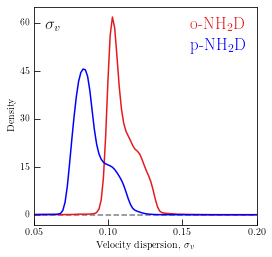

In [29]:
# color_kde1 = '#e41a1c'
# color_kde2 = 'blue'
xrange = np.array([0.05, 0.2])
oNH2D_dv = fits.getdata(file_oNH2D_dv)
pNH2D_dv = fits.getdata(file_pNH2D_dv)
oNH2D_edv = fits.getdata(file_oNH2D_edv)
pNH2D_edv = fits.getdata(file_pNH2D_edv)
gd_o = np.isfinite(oNH2D_dv)
gd_p = np.isfinite(pNH2D_dv)
wt_o = 1 / oNH2D_edv[gd_o]**2
wt_p = 1 / pNH2D_edv[gd_p]**2

print(np.min(wt_o))
#
kde_dv_o = stats.gaussian_kde(oNH2D_dv[gd_o], weights=wt_o)
kde_dv_p = stats.gaussian_kde(pNH2D_dv[gd_p], weights=wt_p)
x_sample = np.linspace(xrange[0], xrange[1], num=100)
dv_o_sample = np.reshape(kde_dv_o(x_sample).T, x_sample.shape)
dv_p_sample = np.reshape(kde_dv_p(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, dv_o_sample, color=color_kde[0], label=r'o-NH$_2$D')
ax.plot(x_sample, dv_p_sample, color=color_kde[1], label=r'p-NH$_2$D')
#
# ax.text(0.05, 0.9,  r'$\sigma_v$(NH$_3$)', color=color_kde, 
#         transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity dispersion, $\sigma_{v}$")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)

ax.text(0.05, 0.9,  r'$\sigma_v$', color='black', 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'p-NH$_2$D', color=color_kde[1], 
        transform=ax.transAxes, size=17, weight=60)


ax.set_xticks([0.05, 0.1, 0.15, 0.2])
ax.set_yticks([0, 15, 30, 45, 60])
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)


## Checks of different variables

For sanity, it is always useful to perform different comparisons. First step will be plotting tau and error on tau, sometime some odd correlations are identified. Lets keep in mind that the minimum signal to noise in tau of 3 was already enforced.

In [30]:
oNH2D_tau, hd_2d = fits.getdata(file_oNH2D_tau, header=True)
oNH2D_etau = fits.getdata(file_oNH2D_etau)
oNH2D_mask = (oNH2D_etau > 0.) & (np.isfinite(oNH2D_tau))
oNH2D_Vlsr = fits.getdata(file_oNH2D_Vlsr)
oNH2D_eVlsr = fits.getdata(file_oNH2D_eVlsr)
oNH2D_dv = fits.getdata(file_oNH2D_dv)
oNH2D_edv = fits.getdata(file_oNH2D_edv)
oNH2D_Tex = fits.getdata(file_oNH2D_Tex)
oNH2D_eTex = fits.getdata(file_oNH2D_eTex)

In [31]:
pNH2D_tau = fits.getdata(file_pNH2D_tau)
pNH2D_etau = fits.getdata(file_pNH2D_etau)
pNH2D_mask = (pNH2D_etau > 0.) & (np.isfinite(pNH2D_tau))
pNH2D_Vlsr = fits.getdata(file_pNH2D_Vlsr)
pNH2D_eVlsr = fits.getdata(file_pNH2D_eVlsr)
pNH2D_dv = fits.getdata(file_pNH2D_dv)
pNH2D_edv = fits.getdata(file_pNH2D_edv)
pNH2D_Tex = fits.getdata(file_pNH2D_Tex)
pNH2D_eTex = fits.getdata(file_pNH2D_eTex)

Text(0, 0.5, 'Error Tau')

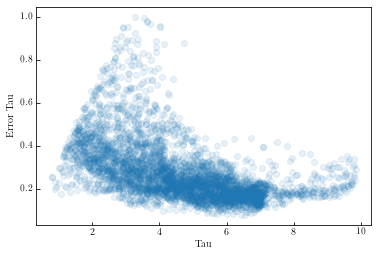

In [32]:
plt.scatter(oNH2D_tau[oNH2D_mask], oNH2D_etau[oNH2D_mask], alpha=0.1)
plt.xlabel('Tau')
plt.ylabel('Error Tau')

The figure above does not show any obvious problem. 

Now lets check the velocity and tau uncertainties.

Text(0, 0.5, 'Error Tau')

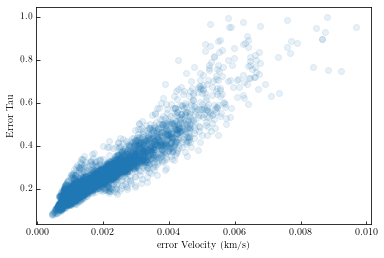

In [33]:
plt.scatter(oNH2D_eVlsr, oNH2D_etau, alpha=0.1)
plt.xlabel('error Velocity (km/s)')
plt.ylabel('Error Tau')

This figure shows that these uncertainties are highly correlated, which makes sense, since a poor determination of tau will imply a poor determination of the centroid velocity. However, notice that the uncertainty in the velocity is minimal.

Text(0, 0.5, 'Tex (K)')

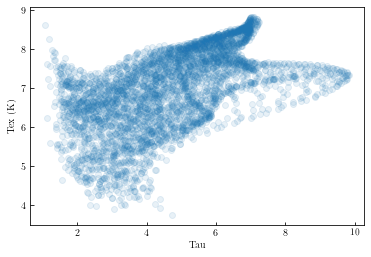

In [34]:
plt.scatter(oNH2D_tau[oNH2D_mask], oNH2D_Tex[oNH2D_mask], alpha=0.1)
plt.xlabel('Tau')
plt.ylabel('Tex (K)')

## KDE
Now I will generate the KDE for tau and Tex to reveal the distribution of these parameters.

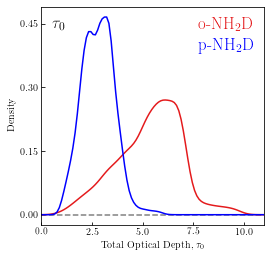

In [35]:
# color_kde = '#e41a1c'
xrange = np.array([0, 11.])

gd_tau =  (oNH2D_etau > 0.)
wt = 1 / oNH2D_etau[gd_tau]**2

gd_p_tau =  (pNH2D_etau > 0.)
p_wt = 1 / pNH2D_etau[gd_p_tau]**2
# gd_tau = oNH2D_mask
kde_tau = stats.gaussian_kde(oNH2D_tau[gd_tau], weights=wt)
kde_p_tau = stats.gaussian_kde(pNH2D_tau[gd_p_tau], weights=p_wt)

x_sample = np.linspace(xrange[0], xrange[1], num=100)
tau_sample = np.reshape(kde_tau(x_sample).T, x_sample.shape)
p_tau_sample = np.reshape(kde_p_tau(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, tau_sample, color=color_kde[0], label=r'$\tau_0$')
ax.plot(x_sample, p_tau_sample, color=color_kde[1], label=r'$\tau_0$')
#
ax.text(0.05, 0.9,  r'$\tau_0$', color='black', 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'p-NH$_2$D', color=color_kde[1], 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Total Optical Depth, $\tau_{0}$")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)

ax.set_xticks([0, 2.5, 5, 7.5, 10])
ax.set_yticks([0, 0.15, 0.3, 0.45])



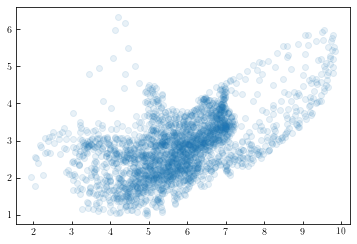

In [36]:
plt.scatter(oNH2D_tau, pNH2D_tau, alpha=0.1)

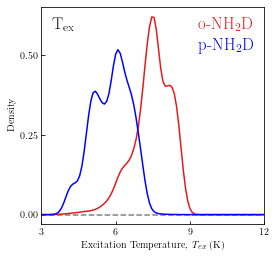

In [39]:

xrange_tex = np.array([3, 12])

gd_o_tex =  (oNH2D_eTex > 0.)
wt_o_tex = 1. / oNH2D_eTex[gd_o_tex]**2
kde_o_tex = stats.gaussian_kde(oNH2D_Tex[gd_o_tex], weights=wt_o_tex)

gd_p_tex =  (pNH2D_eTex > 0.)
wt_p_tex = 1. / pNH2D_eTex[gd_p_tex]**2
kde_p_tex = stats.gaussian_kde(pNH2D_Tex[gd_p_tex], weights=wt_p_tex)

x_sample = np.linspace(xrange_tex[0], xrange_tex[1], num=100)
o_tex_sample = np.reshape(kde_o_tex(x_sample).T, x_sample.shape)
p_tex_sample = np.reshape(kde_p_tex(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange_tex, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, o_tex_sample, color=color_kde[0])
ax.plot(x_sample, p_tex_sample, color=color_kde[1])
#
ax.text(0.05, 0.9,  r'T$_{\rm ex}$', color='black', 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'p-NH$_2$D', color=color_kde[1], 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Excitation Temperature, $T_{ex}$ (K)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange_tex)


ax.set_xticks([3, 6, 9, 12])
ax.set_yticks([0, 0.25, 0.5])

plt.savefig('figs/compare_op-NH2D_Tex.pdf')

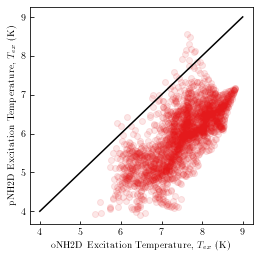

In [40]:
# color_kde = '#e41a1c'
xrange_tex = np.array([3, 12])
gd_tex =  (oNH2D_eTex * pNH2D_eTex > 0.)

poNH2D_Tex = pNH2D_eTex / oNH2D_eTex

# wt_tex = 1. / oNH2D_eTex[gd_tex]**2
# kde_tex = stats.gaussian_kde(oNH2D_Tex[gd_tex], weights=wt_tex)
# x_sample = np.linspace(xrange_tex[0], xrange_tex[1], num=100)
# tex_sample = np.reshape(kde_tex(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
# ax.plot(xrange_tex, [0, 0], color='gray', linestyle='--')
ax.scatter(oNH2D_Tex[gd_tex], pNH2D_Tex[gd_tex], color=color_kde[0], alpha=0.1)
#
# ax.text(0.05, 0.9,  r'T$_{\rm ex}$(o-NH$_2$D)', color=color_kde, 
#         transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"oNH2D Excitation Temperature, $T_{ex}$ (K)")
ax.set_ylabel(r"pNH2D Excitation Temperature, $T_{ex}$ (K)")
ax.plot([4, 9], [4, 9], color='black')
# ax.set_ylabel(r"para-NH2D / ortho-NH2D")
# ax.set_xlim(xrange_tex)


# ax.set_xticks([3, 6, 9, 12])
# ax.set_yticks([0, 0.25, 0.5])


In [72]:
xrange_dv = np.array([0., 0.16])

# Channel width = 0.1 km/s
chan_oNH2D = 0.10647 / 2.355
chan_pNH2D = 0.08305 / 2.355
oNH2D_dv_nochan = np.sqrt(oNH2D_dv**2 - chan_oNH2D**2)
pNH2D_dv_nochan = np.sqrt(pNH2D_dv**2 - chan_pNH2D**2)

gd = np.isfinite(oNH2D_dv * oNH2D_edv)
kde_dv_oNH2D = stats.gaussian_kde(oNH2D_dv[gd], weights=1/oNH2D_edv[gd]**2)
kde_dv_oNH2D_nochan = stats.gaussian_kde(oNH2D_dv_nochan[gd], weights=1/oNH2D_edv[gd]**2)

gd = np.isfinite(pNH2D_dv * pNH2D_edv)
kde_dv_pNH2D = stats.gaussian_kde(pNH2D_dv[gd], weights=1/pNH2D_edv[gd]**2)
kde_dv_pNH2D_nochan = stats.gaussian_kde(pNH2D_dv_nochan[gd], weights=1/pNH2D_edv[gd]**2)

x_sample = np.linspace(xrange_dv[0], xrange_dv[1], num=1000)
dv_oNH2D_sample = np.reshape(kde_dv_oNH2D(x_sample).T, x_sample.shape)
dv_pNH2D_sample = np.reshape(kde_dv_pNH2D(x_sample).T, x_sample.shape)
dv_oNH2D_nochan_sample = np.reshape(kde_dv_oNH2D_nochan(x_sample).T, x_sample.shape)
dv_pNH2D_nochan_sample = np.reshape(kde_dv_pNH2D_nochan(x_sample).T, x_sample.shape)

print(x_sample[np.argmax(dv_oNH2D_nochan_sample)]*1e3)
print(x_sample[np.argmax(dv_pNH2D_nochan_sample)]*1e3)

92.73273273273273
76.23623623623624


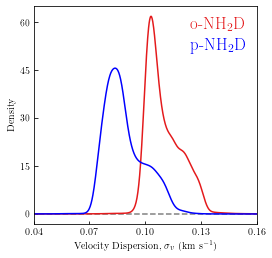

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange_dv, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, dv_oNH2D_sample, color=color_kde[0], label=r'$\sigma_v$')
ax.plot(x_sample, dv_pNH2D_sample, color=color_kde[1], label=r'$\sigma_v$')
#
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'p-NH$_2$D', color=color_kde[1],
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity Dispersion, $\sigma_{v}$ (km s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim([0.05, 0.16])

ax.set_xticks([0.04, 0.07, 0.1, 0.13, 0.16])
ax.set_yticks([0, 15, 30, 45, 60])

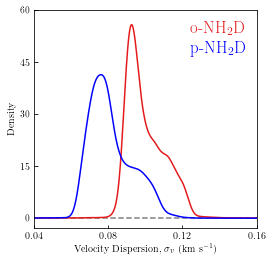

In [74]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, dv_oNH2D_nochan_sample, color=color_kde[0], label=r'$\sigma_v$')
ax.plot(x_sample, dv_pNH2D_nochan_sample, color=color_kde[1], label=r'$\sigma_v$')
#
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'p-NH$_2$D', color=color_kde[1],
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity Dispersion, $\sigma_{v}$ (km s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim([0.04, 0.16])

ax.set_xticks([0.04, 0.08, 0.12, 0.16])
ax.set_yticks([0, 15, 30, 45, 60])
plt.savefig('figs/compare_opNH2D_dv_nochannel.pdf')

In [75]:
def hmm1_kde(my_X, my_Y, ymin=0, ymax=2.5, xmin=-0.0002, xmax=0.0008, 
             get_XY=False):
#     ymin=0
#     ymax=2.5
#     xmin=-0.0002
#     xmax=0.0008
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([my_X, my_Y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    if get_XY == False:
        return Z
    else:
        return X, Y, Z


# gd = (Tau_dv > 0.2)
# ymin_flux=0
# ymax_flux=2.5
# xmin_flux=-0.0002
# xmax_flux=0.0008
# X_KDE, Y_KDE, Z_flux = L1544_KDE(new_image[gd], Tau_dv[gd], 
#                                  xmin=xmin_flux, xmax=xmax_flux, ymin=ymin_flux, ymax=ymax_flux, 
#                                  get_XY=True)

### Column density calculations

The column density of para/ortho-NH$_2$D is determined using the optically thin column density approximation:
$$N({\rm p/o-NH_2D})_{total} = \frac{8\pi \nu^3}{c^3 A_{ul}} \frac{Q(T_{ex})}{g_u e^{-E_u/kT_{ex}}} \left[e^{h\nu/kT_{ex}}-1\right]^{-1}\int \tau dv~,$$
where
$$ \int \tau dv = \sqrt{2\pi}\ \tau_0 \sigma_v~.$$
This value is consistent with those used by Harju et al. (2017, https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..61H/abstract).

Here we check the validity of the function by comparing with previous calculations from Harju et al. (2017).

o-NH$_2$D ($1_{11}$-$1_{01}$) at 85.9 GHz, $\tau_0$=5.1, T$_{ex}$=7.0 K, $\Delta v$=0.235 km/s  $\rightarrow$ N(o-NH$_2$D)$_{tot}=1.1\times10^{14}$ cm$^{-2}$.

p-NH$_2$D ($1_{11}$-$1_{01}$) at 110.2 GHz, $\tau_0$=2.3, T$_{ex}$=5.9 K, $\Delta v$=0.222 km/s  $\rightarrow$ N(p-NH$_2$D)$_{tot}=4.6\times10^{13}$ cm$^{-2}$

In [76]:
mol_col.col_nh2d.o_NH2D_thick(tau=5.1, Tex=7.0*u.K, sigma_v=0.235/2.355*u.km/u.s)

<Quantity 1.13788657e+14 1 / cm2>

In [77]:
mol_col.col_nh2d.p_NH2D_thick(tau=2.3, Tex=5.9*u.K, sigma_v=0.222/2.355*u.km/u.s)

<Quantity 4.64035251e+13 1 / cm2>

The mean excitation temperature for o-NH2D is estimated using only those pixels with a good optically thick fit. This value could be used to derive a comparison of the column density range.

After determining this value, then we calculate the column density for the full fit and for the that using the mean Tex.

In [78]:
oNH2D_mask_ncol = oNH2D_mask & np.isfinite(oNH2D_Tex*oNH2D_eTex)
pNH2D_mask_ncol = pNH2D_mask & np.isfinite(pNH2D_Tex*pNH2D_eTex)

In [79]:
oTex_mean = oNH2D_Tex[oNH2D_mask_ncol].mean() * u.K
pTex_mean = pNH2D_Tex[pNH2D_mask_ncol].mean() * u.K
print(oTex_mean, pTex_mean)

6.931963761851679 K 5.926082966715797 K


In [80]:
HMM1_oNH2D_Ncol_full = oNH2D_tau * np.nan
HMM1_oNH2D_Ncol_full[oNH2D_mask_ncol] = mol_col.col_nh2d.o_NH2D_thick(tau=oNH2D_tau[oNH2D_mask_ncol], 
                                             Tex=oNH2D_Tex[oNH2D_mask_ncol]*u.K, 
                                             sigma_v=oNH2D_dv[oNH2D_mask_ncol]*u.km/u.s)

In [81]:
HMM1_pNH2D_Ncol_full = pNH2D_tau * np.nan
HMM1_pNH2D_Ncol_full[pNH2D_mask_ncol] = mol_col.col_nh2d.p_NH2D_thick(tau=pNH2D_tau[pNH2D_mask_ncol], 
                                             Tex=pNH2D_Tex[pNH2D_mask_ncol]*u.K, 
                                             sigma_v=pNH2D_dv[pNH2D_mask_ncol]*u.km/u.s)

In [82]:
HMM1_oNH2D_Ncol_mTex = mol_col.col_nh2d.o_NH2D_thick(tau=oNH2D_tau[oNH2D_mask],
                                             Tex=oTex_mean, 
                                             sigma_v=oNH2D_dv[oNH2D_mask]*u.km/u.s)

In [83]:
HMM1_pNH2D_Ncol_mTex = mol_col.col_nh2d.p_NH2D_thick(tau=pNH2D_tau[pNH2D_mask],
                                             Tex=pTex_mean, 
                                             sigma_v=pNH2D_dv[pNH2D_mask]*u.km/u.s)

The difference between those two estimates could be substantial, and it is only due to the difference in excitation temperature.

Text(0, 0.5, 'N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$) (10$^{14}$ cm$^{-2}$)')

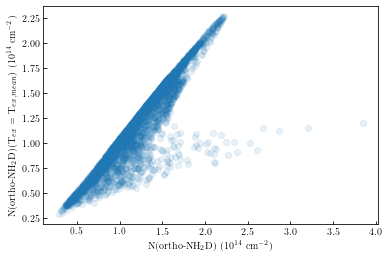

In [84]:
plt.scatter(HMM1_oNH2D_Ncol_full[oNH2D_mask]/1e14, HMM1_oNH2D_Ncol_mTex/1e14, alpha=0.1)
plt.xlabel('N(ortho-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
plt.ylabel('N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$) (10$^{14}$ cm$^{-2}$)')

Text(0, 0.5, 'N(ortho-NH$_2$D)/N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$)')

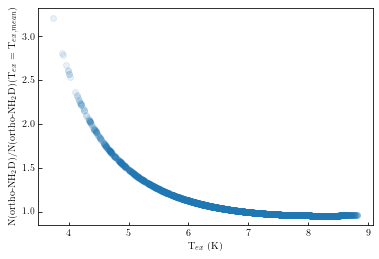

In [85]:
plt.scatter(oNH2D_Tex[oNH2D_mask], HMM1_oNH2D_Ncol_full[oNH2D_mask]/HMM1_oNH2D_Ncol_mTex, alpha=0.1)
plt.xlabel('T$_{ex}$ (K)')
plt.ylabel('N(ortho-NH$_2$D)/N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$)')

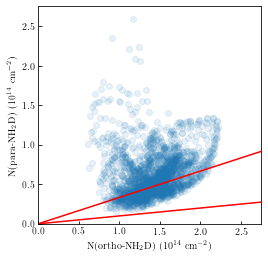

In [86]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(HMM1_oNH2D_Ncol_full[oNH2D_mask]/1e14,
           HMM1_pNH2D_Ncol_full[oNH2D_mask]/1e14, alpha=0.1)
x_sample = np.array([0, 4])
ax.plot(x_sample, x_sample/3., color='red')
ax.plot(x_sample, x_sample/10., color='red')
ax.set_xlabel('N(ortho-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
ax.set_ylabel('N(para-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
ax.set_xlim([0., 2.75])
ax.set_ylim([0., 2.75])

plt.savefig('figs/compare_op-NH2D.pdf')

In [87]:
# HMM1_NH2D_Ncol_full = oNH2D_dv + np.nan
# HMM1_oNH2D_Ncol_full_map = oNH2D_dv + np.nan
# HMM1_pNH2D_Ncol_full_map = pNH2D_dv + np.nan
# HMM1_oNH2D_Ncol_full_map[oNH2D_mask] = HMM1_oNH2D_Ncol_full
# HMM1_pNH2D_Ncol_full_map[pNH2D_mask] = HMM1_pNH2D_Ncol_full
# HMM1_NH2D_Ncol_full = HMM1_oNH2D_Ncol_full_map + HMM1_pNH2D_Ncol_full_map

HMM1_NH2D_Ncol_full = HMM1_oNH2D_Ncol_full + HMM1_pNH2D_Ncol_full

hd_2d['BUNIT'] = 'cm^-2'
hdu_oNH2D_clean = fits.PrimaryHDU(HMM1_oNH2D_Ncol_full/1e14, hd_2d)
hdu_pNH2D_clean = fits.PrimaryHDU(HMM1_pNH2D_Ncol_full/1e14, hd_2d)
hd_2d['BUNIT'] = ''
hdu_opNH2D_clean = fits.PrimaryHDU(HMM1_oNH2D_Ncol_full/HMM1_pNH2D_Ncol_full,
                                   hd_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


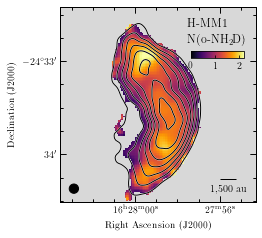

In [88]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_oNH2D_clean, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=2.2, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'N(o-NH$_2$D)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0, 1, 2])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_Ncol.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


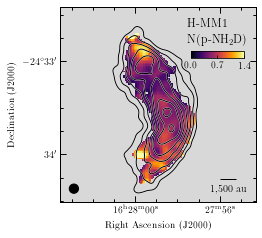

In [89]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_pNH2D_clean, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=1.4, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color, do_para=True)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'N(p-NH$_2$D)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0, 0.7, 1.4])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_pNH2D_Ncol.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


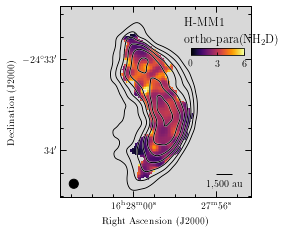

In [90]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_opNH2D_clean, figsize=(4, 4))
fig.show_colorscale(vmin=0, vmax=6, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'ortho-para(NH$_2$D)', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0, 3, 6])
plt.tight_layout()
#
fig.savefig('figs/H-MM1_NH2D_op_ratio.pdf', dpi=100)

Calculation of the ortho-para ratio

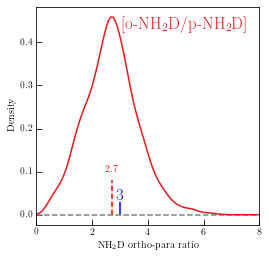

In [91]:
# color_kde = '#e41a1c'
xrange = np.array([0, 8.])
HMM1_opNH2D_Ncol_full = HMM1_oNH2D_Ncol_full/HMM1_pNH2D_Ncol_full
gd_ratio = np.isfinite(HMM1_oNH2D_Ncol_full * HMM1_pNH2D_Ncol_full)

HMM1_opNH2D_mean = np.round(np.mean(HMM1_opNH2D_Ncol_full[gd_ratio]), decimals=1)
# wt = 1 / ev_diff[gd_velo]**2
#
kde_Nratio = stats.gaussian_kde(HMM1_opNH2D_Ncol_full[gd_ratio])
x_sample = np.linspace(xrange[0], xrange[1], num=100)
Nratio_sample = np.reshape(kde_Nratio(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, Nratio_sample, color=color_kde[0], 
        label=r'$\delta$ V$_{lsr}$')
#
ax.text(0.95, 0.9,  r'[o-NH$_2$D/p-NH$_2$D]', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60, horizontalalignment='right')
ax.set_xlabel(r"NH$_2$D ortho-para ratio")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)

# ax.set_xticks([0, 6, 12, 18, 24])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

# add vertical markers with mean values, plus text
ax.vlines(HMM1_opNH2D_mean, ymin=0, ymax=0.08, color='red', linestyle='--')
ax.text(HMM1_opNH2D_mean, 0.1, HMM1_opNH2D_mean, color='red', horizontalalignment='center')
# ax.text(mean_NH3_pNH2D, 3.5, mean_NH3_pNH2D, color='red', horizontalalignment='center')


ax.vlines(3.0, ymin=0, ymax=0.03, color='blue')
ax.text(3, 0.035,  r'3', color='blue', size=17, weight=60, horizontalalignment='center')

fig.savefig('figs/H-MM1_NH2D_op_ratio_KDE.pdf', dpi=100)

In [92]:
import scipy
range_oNH2D = [0.5, 2.5]
HMM1_opNH2D_Ncol_full = HMM1_oNH2D_Ncol_full / HMM1_pNH2D_Ncol_full
gd_opNH2D = np.isfinite(HMM1_oNH2D_Ncol_full * HMM1_pNH2D_Ncol_full)
bin_means_opNH2D, bin_edges_opNH2D, binnumber_opNH2D = scipy.stats.binned_statistic(
    HMM1_oNH2D_Ncol_full[gd_opNH2D]*1e-14, 
    HMM1_opNH2D_Ncol_full[gd_opNH2D], #/HMM1_pNH2D_Ncol_full[gd_opNH2D], 
    statistic='mean', bins=15, range=range_oNH2D)

bin_ctr_opNH2D = 0.5 * (bin_edges_opNH2D[1:] + bin_edges_opNH2D[:-1])

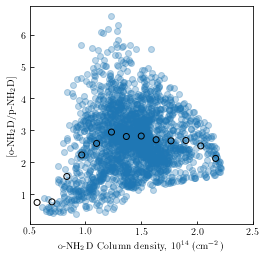

In [93]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(HMM1_oNH2D_Ncol_full[gd_opNH2D]*1e-14, 
           HMM1_opNH2D_Ncol_full[gd_opNH2D],
          alpha=0.3)
ax.scatter(bin_ctr_opNH2D, bin_means_opNH2D, edgecolor='black', facecolors='None')
ax.set_xlim(range_oNH2D)

ax.set_xlabel(r"o-NH$_2$D Column density, $10^{14}$ (cm$^{-2}$)")
ax.set_ylabel(r'[o-NH$_2$D/p-NH$_2$D]')
ax.set_aspect('auto')
fig.savefig('figs/H-MM1_opNH2D_v_NH2D.pdf')

In [94]:
np.nanmax(HMM1_oNH2D_Ncol_full)

385156204132317.3

## o-NH$_2$D/NH$_3$
For this calculation we need to regrid the o-NH$_2$D column density map to match that of the NH3 one.

In [96]:
from reproject import reproject_interp
hd_Ncol = fits.getheader(file_NH3_Ncol)
N_H2 = fits.getdata(file_H2)

oNH2D_array, footprint = reproject_interp(hdu_oNH2D_clean, hd_Ncol)

oNH2D_NH3 = oNH2D_array/10**(NH3_Ncol-14.)
oNH2D_H2 = oNH2D_array*1e14/N_H2
NH3_H2 = 10**NH3_Ncol/N_H2

hdu_oNH2D_NH3_regrid = fits.PrimaryHDU(oNH2D_NH3, hd_Ncol)
hdu_oNH2D_regrid = fits.PrimaryHDU(oNH2D_array*1e14, hd_Ncol)

hdu_oNH2D_H2_regrid = fits.PrimaryHDU(oNH2D_H2, hd_Ncol)
hdu_NH3_H2_regrid = fits.PrimaryHDU(NH3_H2, hd_Ncol)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


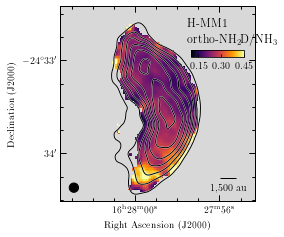

In [97]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid, figsize=(4, 4))
fig.show_colorscale(vmin=0.1, vmax=0.45, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'ortho-NH$_2$D/NH$_3$', relative=True, 
                horizontalalignment='left', color=text_color, size=12)

fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
fig.colorbar.set_ticks([0.15, 0.3, 0.45])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_NH3_ratio.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


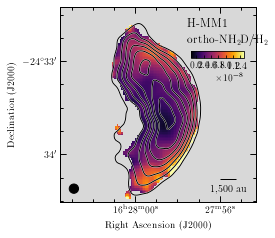

In [110]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_oNH2D_H2_regrid, figsize=(4, 4))
# fig.show_colorscale(cmap='inferno', interpolation='None')
fig.show_colorscale(vmin=5e-10, vmax=1.5e-8, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'ortho-NH$_2$D/H$_2$', relative=True, 
                horizontalalignment='left', color=text_color, size=12)

fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
# fig.colorbar.set_ticks([0.15, 0.3, 0.45])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_oNH2D_H2_ratio.pdf', dpi=100)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("inferno").copy()
  cm.set_bad(color)
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


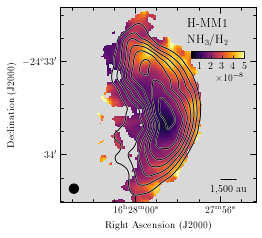

In [114]:
text_color = 'black'
fig = aplpy.FITSFigure(hdu_NH3_H2_regrid, figsize=(4, 4))
# fig.show_colorscale(cmap='inferno', interpolation='None')
fig.show_colorscale(vmin=2e-9, vmax=5e-8, cmap='inferno', interpolation='None')
plot_setup_alma(fig, label_col=text_color)
#
fig.add_label(xpos_lab1, ypos_lab1, 'H-MM1', relative=True, 
                horizontalalignment='left', color=text_color, size=12)
fig.add_label(xpos_lab2, ypos_lab2, r'NH$_3$/H$_2$', relative=True, 
                horizontalalignment='left', color=text_color, size=12)

fig.add_colorbar()
fig.colorbar.set_box(col_pos, 'horizontal')
# fig.colorbar.set_ticks([0.15, 0.3, 0.45])
plt.tight_layout()                                                      
#
fig.savefig('figs/H-MM1_NH3_H2_ratio.pdf', dpi=100)

In [98]:
import scipy
gd_oNH2D_NH3 = np.isfinite(NH3_Ncol_lin * oNH2D_NH3)
bin_means_oNH2D_NH3, bin_edges_oNH2D_NH3, binnumber_oNH2D_NH3 = scipy.stats.binned_statistic(
    NH3_Ncol_lin[gd_oNH2D_NH3], oNH2D_NH3[gd_oNH2D_NH3], 
    statistic='mean', bins=15, range=range_N11)

bin_ctr_oNH2D_NH3 = 0.5 * (bin_edges_oNH2D_NH3[1:] + bin_edges_oNH2D_NH3[:-1])

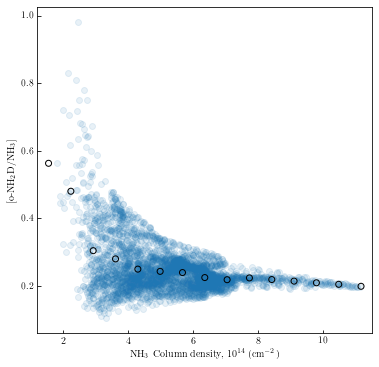

In [99]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(NH3_Ncol_lin, oNH2D_NH3, alpha=0.1)
ax.scatter(bin_ctr_oNH2D_NH3, bin_means_oNH2D_NH3, edgecolor='black', facecolors='None')
ax.set_xlim(range_N11)

ax.set_xlabel(r"NH$_3$ Column density, $10^{14}$ (cm$^{-2}$)")
ax.set_ylabel(r'[o-NH$_2$D/NH$_3$]')
ax.set_aspect('auto')
fig.savefig('figs/H-MM1_oNH2D_NH3_v_NH3.pdf')

In [100]:
# import scipy
# gd_opNH2D = np.isfinite(NH3_Ncol_lin * oNH2D_NH3 * oNH2D)
# bin_means_oNH2D_NH3, bin_edges_oNH2D_NH3, binnumber_oNH2D_NH3 = scipy.stats.binned_statistic(
#     NH3_Ncol_lin[gd_oNH2D_NH3], oNH2D_NH3[gd_oNH2D_NH3], 
#     statistic='mean', bins=15, range=range_N11)

# bin_ctr_oNH2D_NH3 = 0.5 * (bin_edges_oNH2D_NH3[1:] + bin_edges_oNH2D_NH3[:-1])

In [101]:
Ncol_NH3_min = 14.0
Ncol_NH3_max = 15.1
Ncol_ratio_min = 0.
Ncol_ratio_max = 1.0
gd_col = np.isfinite(NH3_Ncol * oNH2D_NH3)
NH3_Ncol_ratio_kde = hmm1_kde(NH3_Ncol[gd_col], oNH2D_NH3[gd_col], 
                              ymin=Ncol_ratio_min, ymax=Ncol_ratio_max, 
                              xmin=Ncol_NH3_min, xmax=Ncol_NH3_max, 
                              get_XY=False)

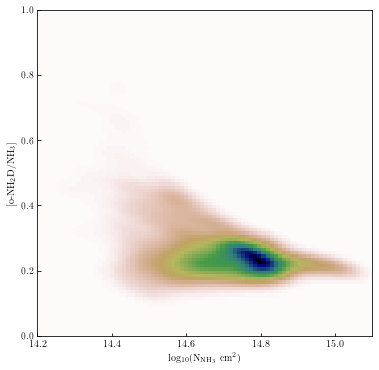

In [102]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(NH3_Ncol_ratio_kde), cmap=plt.cm.gist_earth_r, 
          extent=[Ncol_NH3_min, Ncol_NH3_max, 
                  Ncol_ratio_min, Ncol_ratio_max])
ax.set_xlim([14.2, Ncol_NH3_max])
ax.set_ylim([Ncol_ratio_min, 1])
ax.set_xlabel(r'log$_{10}$(N$_{\rm NH_3}$ cm$^2$)')
ax.set_ylabel(r'[o-NH$_2$D/NH$_3$]')
ax.set_aspect('auto')
plt.show()

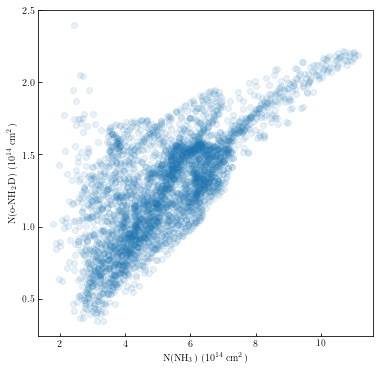

In [103]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(10**(NH3_Ncol-14.), oNH2D_array, alpha=0.1)
ax.set_xlabel(r'N(NH$_3$) (10$^{14}$ cm$^2$)')
ax.set_ylabel(r'N(o-NH$_2$D) (10$^{14}$ cm$^2$)')
# ax.set_ylabel(r'[o-NH$_2$D/NH$_3$]')
ax.set_aspect('auto')


<[o-NH2D/NH3]> = 0.25012240306525185


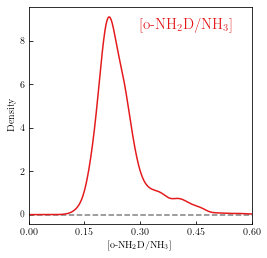

In [104]:
X_oNH2D_NH3 = (oNH2D_array / 10**(NH3_Ncol - 14.))
gd_X_oNH2D_NH3 =  np.isfinite(X_oNH2D_NH3) # (X_oNH2D_NH3 > 0.)
X_oNH2D_NH3_mean = np.mean(X_oNH2D_NH3[gd_X_oNH2D_NH3])
print('<[o-NH2D/NH3]> = {0}'.format(X_oNH2D_NH3_mean))

# plt.scatter(10**(NH3_Ncol-14.), oNH2D_array, alpha=0.1)
# color_kde = ['#e41a1c', 'blue']
# xrange = np.array([0, np.log10(12)])
xrange = np.array([0., 0.6])



# wt = 1 / oNH2D_edv[gd_dv]**2
kde_oNH2D_NH3 = stats.gaussian_kde(X_oNH2D_NH3[gd_X_oNH2D_NH3])  # , weights=wt)

x_sample = np.linspace(xrange[0], xrange[1], num=500)
X_oNH2D_NH3_sample = np.reshape(kde_oNH2D_NH3(x_sample).T, x_sample.shape)

#########
### oNH2D/NH3
#########
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, X_oNH2D_NH3_sample, color=color_kde[0], label=r'$\sigma_v$')
# ax.plot(x_sample, NH3_dv_sample, color=color_kde[1], label=r'$\sigma_v$')
# ax.plot(x_sample, NH3_dv_sample_0, color=color_kde[1], label=r'$\sigma_v$')
#
ax.text(0.5, 0.9,  r'[o-NH$_2$D/NH$_3$]', color=color_kde[0], 
        transform=ax.transAxes, size=15, weight=60)
# ax.text(0.7, 0.8,  r'NH$_3$', color=color_kde[1], 
#         transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"[o-NH$_2$D/NH$_3$]")
ax.set_ylabel(r"Density")
ax.set_xlim([0.0, 0.6])

ax.set_xticks([0., 0.15, 0.3, 0.45, 0.6])
# ax.set_yticks([0, 0.2, 0.40, 0.60])

fig.savefig('figs/H-MM1_X_oNH2D_NH3_kde.pdf', dpi=100)

In [ ]:
Ncol_NH3_14_min = 0.0
Ncol_NH3_14_max = 12.0
Ncol_NH2D_14_min = 0.
Ncol_NH2D_14_max = 3.
gd_col = np.isfinite(10**(NH3_Ncol-14.) * oNH2D_array)
NH3_Ncol_14_kde = hmm1_kde(10**(NH3_Ncol[gd_col]-14.), 
                           oNH2D_array[gd_col], 
                           xmin=Ncol_NH3_14_min, xmax=Ncol_NH3_14_max, 
                           ymin=Ncol_NH2D_14_min, ymax=Ncol_NH2D_14_max, 
                           get_XY=False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(NH3_Ncol_14_kde), cmap=plt.cm.gist_earth_r, 
          extent=[Ncol_NH3_14_min, Ncol_NH3_14_max, 
                  Ncol_NH2D_14_min, Ncol_NH2D_14_max])
ax.set_xlim([Ncol_NH3_14_min, Ncol_NH3_14_max])
ax.set_ylim([Ncol_NH2D_14_min, Ncol_NH2D_14_max])
ax.set_xlabel(r'N(NH$_3$) (10$^{14}$ cm$^{-2}$)')
ax.set_ylabel(r'N(o-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
ax.set_aspect('auto')
plt.show()

In [ ]:
from reproject import reproject_interp
hd_dv = fits.getheader(file_NH3_dv)
oNH2D_dv_array, footprint = reproject_interp(file_oNH2D_dv, hd_dv)
oNH2D_vlsr_array, footprint = reproject_interp(file_oNH2D_Vlsr, hd_dv)

pNH2D_dv_array, footprint = reproject_interp(file_pNH2D_dv, hd_dv)
pNH2D_vlsr_array, footprint = reproject_interp(file_pNH2D_Vlsr, hd_dv)

# oNH2D_NH3 = oNH2D_array/10**(NH3_Ncol-14.)
hdu_oNH2D_NH3_regrid_dv = fits.PrimaryHDU(oNH2D_dv_array, hd_dv)
hdu_oNH2D_NH3_regrid_vlsr = fits.PrimaryHDU(oNH2D_vlsr_array, hd_dv)

hdu_pNH2D_NH3_regrid_dv = fits.PrimaryHDU(pNH2D_dv_array, hd_dv)
hdu_pNH2D_NH3_regrid_vlsr = fits.PrimaryHDU(pNH2D_vlsr_array, hd_dv)

# hdu_oNH2D_regrid = fits.PrimaryHDU(oNH2D_array*1e14, hd_Ncol)

In [ ]:
# color_kde = ['#e41a1c', 'blue']
# xrange = np.array([0, np.log10(12)])
xrange = np.array([0.04, 0.2])


gd_dv =  (oNH2D_edv > 0.)
wt = 1 / oNH2D_edv[gd_dv]**2
kde_oNH2D_dv = stats.gaussian_kde(oNH2D_dv[gd_dv], weights=wt)

gd_dv = (NH3_dv > 0.)
gd_dv_0 = np.isfinite(oNH2D_dv_array / NH3_dv)
wt = 1 / NH3_edv[gd_dv]**2
wt_0 = 1 / NH3_edv[gd_dv_0]**2
kde_NH3_dv = stats.gaussian_kde(NH3_dv[gd_dv], weights=wt)
kde_NH3_dv_0 = stats.gaussian_kde(NH3_dv[gd_dv_0], weights=wt_0)

x_sample = np.linspace(xrange[0], xrange[1], num=100)
NH3_dv_sample = np.reshape(kde_NH3_dv(x_sample).T, x_sample.shape)
NH3_dv_sample_0 = np.reshape(kde_NH3_dv_0(x_sample).T, x_sample.shape)
oNH2D_dv_sample = np.reshape(kde_oNH2D_dv(x_sample).T, x_sample.shape)

#########
### Velocity Dispersion
#########
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, oNH2D_dv_sample, color=color_kde[0], label=r'$\sigma_v$')
ax.plot(x_sample, NH3_dv_sample, color=color_kde[1], label=r'$\sigma_v$')
ax.plot(x_sample, NH3_dv_sample_0, color=color_kde[1], label=r'$\sigma_v$')
#
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'NH$_3$', color=color_kde[1], 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity Dispersion, $\sigma_{v}$ (km s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim([0.07, 0.17])

ax.set_xticks([0.07, 0.1, 0.13, 0.16])
ax.set_yticks([0, 20, 40, 60])


In [ ]:
dv_sample = [0.08, 0.2]
plt.scatter(NH3_dv, oNH2D_dv_array, alpha=0.1)
plt.plot(dv_sample, dv_sample, color='red')
plt.xlim(dv_sample)
plt.ylim(dv_sample)
# plt.set_as ('auto')
plt.xlabel('NH$_3$ Velocity Dispersion (km s$^{-1}$)')
plt.ylabel('o-NH$_2$D Velocity Dispersion (km s$^{-1}$)')

In [ ]:
fig = plt.figure(figsize=(8, 4))

fig_1 = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid_dv, figure=fig, 
                         subplot=[0.1, 0.1, 0.4, 0.8])
fig_1.show_colorscale(vmin=0.08, vmax=0.16)
fig_1.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_1, do_zoom=True)
fig_1.add_colorbar()
fig_1.colorbar.hide()
fig_1.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)


fig_2 = aplpy.FITSFigure(file_NH3_dv, figure=fig, 
                         subplot=[0.5, 0.1, 0.4, 0.8])
fig_2.show_colorscale(vmin=0.08, vmax=0.16)
fig_2.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_2, do_zoom=True)
fig_2.add_colorbar()
fig_2.axis_labels.hide_y()
fig_2.tick_labels.hide_y()
fig_2.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)

fig.savefig('figs/H-MM1_vlsr_maps_comparison.pdf', dpi=100)

In [ ]:
# plt.scatter(NH3_Vlsr, oNH2D_vlsr_array, alpha=0.1)

In [ ]:
fig = plt.figure(figsize=(12, 4))

fig_1 = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid_vlsr, figure=fig, 
                         subplot=[0.1, 0.1, 0.3, 0.8])
fig_1.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
# fig_1.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_1, do_zoom=True)
fig_1.add_colorbar()
fig_1.colorbar.hide()
fig_1.add_label(0.15, 0.9, r'o-NH$_2$D', relative=True)


fig_2 = aplpy.FITSFigure(hdu_pNH2D_NH3_regrid_vlsr, figure=fig, 
                         subplot=[0.4, 0.1, 0.3, 0.8])
fig_2.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
# fig_2.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_2, do_zoom=True)
fig_2.add_colorbar()
fig_2.colorbar.hide()
fig_2.axis_labels.hide_y()
fig_2.tick_labels.hide_y()
fig_2.add_label(0.15, 0.9, r'p-NH$_2$D', relative=True)


fig_3 = aplpy.FITSFigure(file_NH3_Vlsr, figure=fig, 
                         subplot=[0.7, 0.1, 0.3, 0.8])
fig_3.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
# fig_3.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_3, do_zoom=True)
fig_3.add_colorbar()
fig_3.axis_labels.hide_y()
fig_3.tick_labels.hide_y()
fig_3.add_label(0.15, 0.9, r'NH$_3$', relative=True)

fig.savefig('figs/H-MM1_vlsr_maps_comparison.pdf', dpi=100)

In [ ]:
NH3_vlsr_array = fits.getdata(file_NH3_Vlsr)

gd = np.isfinite(NH3_vlsr_array * oNH2D_vlsr_array)
delta_v_NH3_oNH2D = NH3_vlsr_array[gd] - oNH2D_vlsr_array[gd]
gd = np.isfinite(NH3_vlsr_array * pNH2D_vlsr_array)
delta_v_NH3_pNH2D = NH3_vlsr_array[gd] - pNH2D_vlsr_array[gd]

gd = np.isfinite(NH3_vlsr_array * oNH2D_vlsr_array * pNH2D_vlsr_array)
delta_v_NH3_oNH2D_c = NH3_vlsr_array[gd] - oNH2D_vlsr_array[gd]
delta_v_NH3_pNH2D_c = NH3_vlsr_array[gd] - pNH2D_vlsr_array[gd]

gd = np.isfinite(oNH2D_Vlsr * pNH2D_Vlsr)
delta_v_pNH2D_oNH2D = pNH2D_Vlsr[gd] - oNH2D_Vlsr[gd]

In [ ]:
# color_kde = '#e41a1c'
xrange_delta_vlsr = np.array([-0.2, 0.2])

kde_delta_v_NH3_oNH2D = stats.gaussian_kde(delta_v_NH3_oNH2D)
kde_delta_v_NH3_pNH2D = stats.gaussian_kde(delta_v_NH3_pNH2D)

kde_delta_v_pNH2D_oNH2D = stats.gaussian_kde(delta_v_pNH2D_oNH2D)

kde_delta_v_NH3_oNH2D_c = stats.gaussian_kde(delta_v_NH3_oNH2D_c)
kde_delta_v_NH3_pNH2D_c = stats.gaussian_kde(delta_v_NH3_pNH2D_c)

x_sample = np.linspace(xrange_delta_vlsr[0], xrange_delta_vlsr[1], num=1000)
delta_v_NH3_oNH2D_sample = np.reshape(kde_delta_v_NH3_oNH2D(x_sample).T, x_sample.shape)
delta_v_NH3_pNH2D_sample = np.reshape(kde_delta_v_NH3_pNH2D(x_sample).T, x_sample.shape)

delta_v_pNH2D_oNH2D_sample = np.reshape(kde_delta_v_pNH2D_oNH2D(x_sample).T, x_sample.shape)

delta_v_NH3_oNH2D_sample_c = np.reshape(kde_delta_v_NH3_oNH2D_c(x_sample).T, x_sample.shape)
delta_v_NH3_pNH2D_sample_c = np.reshape(kde_delta_v_NH3_pNH2D_c(x_sample).T, x_sample.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(xrange_delta_vlsr*1e3, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample*1e3, delta_v_NH3_pNH2D_sample_c, color='red')
ax.plot(x_sample*1e3, delta_v_NH3_oNH2D_sample_c, color='blue')
# add axis labels and set xlim
ax.set_xlabel(r"$\delta$v$_{\rm lsr}$, (m s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange_delta_vlsr*1e3)

# calcualte the mean difference in velocity between o-/p-NH2D and NH3
mean_NH3_oNH2D_c = np.round(np.mean(delta_v_NH3_oNH2D_c*1e3)).astype(int)
mean_NH3_pNH2D_c = np.round(np.mean(delta_v_NH3_pNH2D_c*1e3)).astype(int)
# mean_NH3_oNH2D = np.round(np.mean(delta_v_NH3_oNH2D*1e3)).astype(int)
# mean_NH3_pNH2D = np.round(np.mean(delta_v_NH3_pNH2D*1e3)).astype(int)

# add vertical markers with mean values, plus text
ax.vlines(mean_NH3_oNH2D_c, ymin=0, ymax=3, color='blue', linestyle='--')
ax.vlines(mean_NH3_pNH2D_c, ymin=0, ymax=3, color='red', linestyle='--')

ax.text(mean_NH3_oNH2D_c, 4.5, mean_NH3_oNH2D_c, color='blue', horizontalalignment='center')
ax.text(mean_NH3_pNH2D_c, 3.5, mean_NH3_pNH2D_c, color='red', horizontalalignment='center')
# vertical marker for no difference in velocity
ax.vlines(0, ymin=0, ymax=15, color='0.3')

# add some text for clarity
ax.text(0.025, 0.925, r'$v_{\rm lsr}$ difference', color='black', horizontalalignment='left', transform=ax.transAxes, size=15)
ax.text(0.025, 0.85, r'NH$_3$/o-NH$_2$D', color='blue', horizontalalignment='left', transform=ax.transAxes, size=15)
ax.text(0.025, 0.775, r'NH$_3$/p-NH$_2$D', color='red', horizontalalignment='left', transform=ax.transAxes, size=15)

ax.text(0.99, 0.925, r'Melosso+(2021)', color='black', horizontalalignment='right', transform=ax.transAxes, size=15)

# ax.set_xticks([3, 6, 9, 12])
ax.set_yticks([0, 5, 10, 15, 20])
fig.savefig('figs/H-MM1_delta_vlsr_NH3_NH2D_kde.pdf', dpi=100)

In [ ]:
np.max(delta_v_NH3_pNH2D)

In [ ]:
np.mean(delta_v_NH3_oNH2D_sample)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange_delta_vlsr*1e3, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample*1e3, delta_v_pNH2D_oNH2D_sample, color='red')
# ax.plot(x_sample*1e3, delta_v_NH3_oNH2D_sample, color='blue')
#
ax.set_xlabel(r"$\delta$v$_{\rm lsr}$, (m s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange_delta_vlsr*1e3/2)

mean_NH3_pNH2D_oNH2D = np.round(np.mean(delta_v_pNH2D_oNH2D*1e3)).astype(int)


ax.vlines(mean_NH3_pNH2D_oNH2D, ymin=0, ymax=5, color='red')
ax.text(mean_NH3_pNH2D_oNH2D, 5.5, mean_NH3_pNH2D_oNH2D, color='red', horizontalalignment='center', size=15)

ax.text(0.05, 0.925, r'$v_{\rm lsr}$ difference', color='black', horizontalalignment='left', transform=ax.transAxes, size=15)
ax.text(0.05, 0.85, r'para-ortho', color='red', horizontalalignment='left', transform=ax.transAxes, size=15)
ax.text(0.05, 0.775, r'NH$_2$D', color='red', horizontalalignment='left', transform=ax.transAxes, size=15)

ax.text(0.99, 0.925, r'Melosso+(2021)', color='black', horizontalalignment='right', transform=ax.transAxes, size=15)

# ax.set_xticks([3, 6, 9, 12])
ax.set_yticks([0, 10, 20, 30, 40])
fig.savefig('figs/H-MM1_delta_vlsr_pNH2D_oNH2D_kde.pdf', dpi=100)

In [ ]:
oNH2D_vlsr_array_test = oNH2D_vlsr_array.copy()
oNH2D_vlsr_array_test[:150, :] = np.nan
gd = np.isfinite(NH3_vlsr_array * oNH2D_vlsr_array_test)
delta_v_NH3_oNH2D = NH3_vlsr_array[gd] - oNH2D_vlsr_array[gd]
gd = np.isfinite(NH3_vlsr_array * pNH2D_vlsr_array)
delta_v_NH3_pNH2D = NH3_vlsr_array[gd] - pNH2D_vlsr_array[gd]

gd = np.isfinite(NH3_vlsr_array * oNH2D_vlsr_array * pNH2D_vlsr_array)
delta_v_NH3_oNH2D_c = NH3_vlsr_array[gd] - oNH2D_vlsr_array[gd]
delta_v_NH3_pNH2D_c = NH3_vlsr_array[gd] - pNH2D_vlsr_array[gd]

gd = np.isfinite(oNH2D_Vlsr * pNH2D_Vlsr)
delta_v_pNH2D_oNH2D = pNH2D_Vlsr[gd] - oNH2D_Vlsr[gd]

In [ ]:
fig = plt.figure(figsize=(12, 4))

fig_1 = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid_vlsr, figure=fig, 
                         subplot=[0.1, 0.1, 0.3, 0.8])
fig_1.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
# fig_1.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_1, do_zoom=True)
fig_1.add_colorbar()
fig_1.colorbar.hide()
fig_1.add_label(0.15, 0.9, r'o-NH$_2$D', relative=True)

In [ ]:
# color_kde = '#e41a1c'
xrange_delta_vlsr = np.array([-0.2, 0.2])

kde_delta_v_NH3_oNH2D_test = stats.gaussian_kde(delta_v_NH3_oNH2D)
delta_v_NH3_oNH2D_sample_test_c = np.reshape(kde_delta_v_NH3_oNH2D_test(x_sample).T, x_sample.shape)


In [ ]:
plt.imshow(oNH2D_vlsr_array_test, origin='lower', cmap='RdYlBu_r', vmin=4., vmax=4.5)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(xrange_delta_vlsr*1e3, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample*1e3, delta_v_NH3_oNH2D_sample_test_c, color='red')

In [ ]:
eVlsr_oNH2D = fits.getdata(file_oNH2D_edv)
print(np.nanmedian(eVlsr_oNH2D)*1e3)